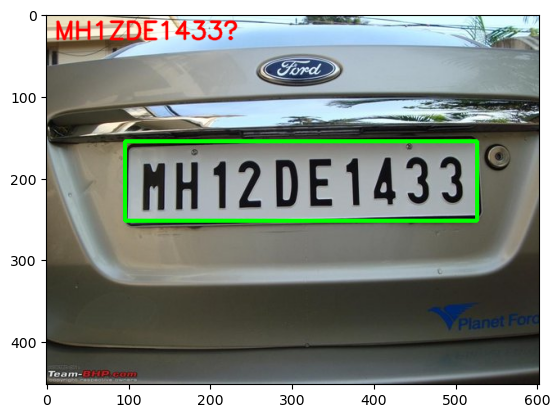

In [1]:
# important libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import pytesseract

# Load the image
image = cv2.imread('img1.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# #check the imeage in RGB format
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))


# Apply Filter blur to reduce noise
bfilter = cv2.bilateralFilter(gray,11,17,17)

# Perform edge detection using Canny
edges = cv2.Canny(bfilter, 30, 200)

# #check the imeage in RGB format
# plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

# Find contours in the edged image
keypoints = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours = imutils.grab_contours(keypoints)

# Sort contours based on their area
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

# Approximate the contour
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,   10, True)
    #  If the contour has four vertices, it could be a number plate
    if len(approx) == 4:
        location = approx
        break

# cheack the vertices 
location

# Mask the number plate region
mask = np.zeros(gray.shape, np.uint8)
new_imeage = cv2.drawContours(mask, [location], 0, 255, -1)
new_imeage = cv2.bitwise_and(image, image, mask=mask)

# #check the imeage in RGB format
# plt.imshow(cv2.cvtColor(new_imeage, cv2.COLOR_BGR2RGB))

(x,y) = np.where(mask == 255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
crop_img = gray[x1:x2+1, y1:y2+1]


# #check the imeage in RGB format
# plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))


# Use Tesseract to do OCR on the grayscale image
result = pytesseract.image_to_string(crop_img)

# # Display the extracted text
# print("Extracted Text:", result)

text = result
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(image, text=text, org=(10,30), fontFace=font, fontScale=1, color=(0,0,255), thickness=2, lineType=cv2.LINE_AA, bottomLeftOrigin = False)
res = cv2.rectangle(image,tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))